# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №1

## №1 (20 баллов)

- Задача минимизации для множественной регресии выглядит вот так:
$$(Y - X\hat{\beta})'(Y - X\hat{\beta}) \rightarrow \min_{\hat{\beta}}$$
- Решите эту задачу минимизации и выведите формулу для оценок коэффициентов $\hat{\beta}$

Я докажу чуть-чуть по-другому по сравнению с предложенным ходом доказательства на лекции

Рассмотрим $ \vec{Y} \in \mathbb{R}^n $, хотим получить оценочные значения: $$\hat{\vec{Y}} = X\hat{\vec{\Theta}} = \vec{x_1}\hat\theta_1 + ... + \vec{x_k}\hat\theta_k$$
То есть наш $\hat{\vec{Y}}$ лежит в каком-то *подпространстве*, мы хотим, чтобы наш вектор $\hat{\vec{Y}}$ лежал максимально близко к вектору $\vec{Y}$ (так поставлена задача выше, по сути выше мы минимизируем расстояние между векторами $\vec Y$ и $\hat{\vec{Y}}$), а это известно из линала - таким вектором будет являться проекция вектора $\vec Y$ на подпространство, которое образуют векторы $\{\vec{x_1}, ... \vec{x_k}\}$

Итак, мы можем представить вектор $\vec Y = \hat{\vec{Y}} + \vec V$, а раз $\hat{\vec{Y}}$ - это проекция, то $\vec V$ перпендикулярен подпространству, образованному векторами $\{\vec{x_1}, ... \vec{x_k}\}$, а значит и

$$ \vec V \perp \vec x_i \forall i $$

$$ \vec V^T X = 0 $$

$$ (\vec Y- \hat{\vec{Y}})^T X = (\vec Y - X\hat{\vec{\Theta}})^TX = 0 $$

$$ \vec Y^T X - \hat{\vec{\Theta}^T}X^TX = 0 $$

$$ \hat{\vec{\Theta}^T} = \vec Y^T X(X^TX)^{-1} \Rightarrow \hat{\vec{\Theta}} = (X^TX)^{-1}X^T \vec Y $$

## №2 (40 баллов)

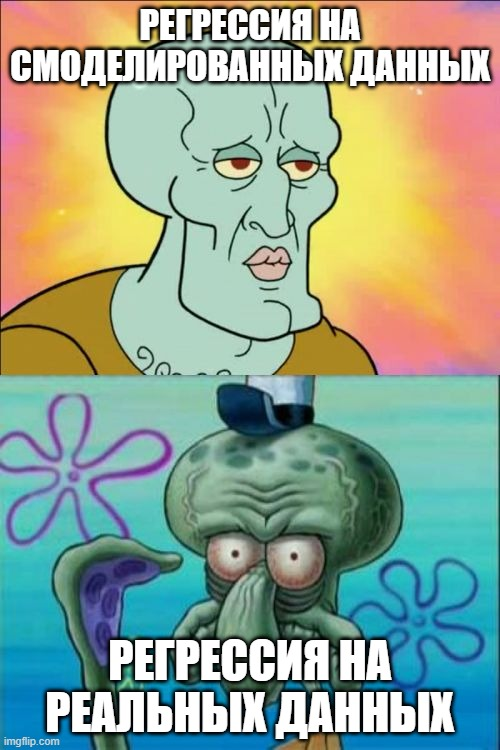

- У нас есть следующий датасет (`HW_001_001.csv`)
- Нам хочется понять, насколько уровень загрязнения воздуха (диоксид азота $NO_2$ в данном случае) влияет на результаты тестов внимания школьников. В данном домашнем задании будем смотреть на **время реакции**.
- Данные собирались в течение периода с января 2012 г. по март 2013 г. в Барселоне. В исследовании приняли участие 39 школ.
    - `react` - время реакции (ms)
    - `correct` - количество верных ответов
    - `omissions` - были ли тест не сдан
    - `no2_class` - уровень $NO_2$ в классе
    - `no2_home` - уровень $NO_2$ дома
    - `age` - возраст на момент исследования
    - `age0` - возраст поступления в школу
    - `sex` - пол
    - `grade` - класс
    - `overweight` - степень ожирения согласно ВОЗ
    - `lbweight` - весовая категория при рождении
    - `breastfeed` - продолжительность кормления грудью
    - `msmoke` - курила ли мать во время беременности
    - `meducation` - уровень образования матери
    - `feducation` - уровень образования отца
    - `siblings_old` - количество братьев\сестер старшего возраста
    - `siblings_old` - количество братьев\сестер младшего возраста
    - `sev_home` - социально-экономический индекс домашнего района
    - `green_home` - [степень озеленения домашнего района](https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php#:~:text=Normalized%20Difference%20Vegetation%20Index%20(NDVI,up%20the%20spectrum%20of%20sunlight)
    - `noise_school` - уровень шума в школе (дБ)
    - `sev_school` - социально-экономический индекс школы
    - `precip` - осадки

In [2]:
import pandas as pd

In [3]:
df_matrix = pd.read_csv('HW_001_001.csv')

- Во-первых, посмотрите на описательные статистики

In [4]:
df_matrix.head()

,react,correct,omissions,no2_class,no2_home,age,age0,sex,grade,overweight,...,msmoke,meducation,feducation,siblings_old,siblings_young,sev_home,green_home,noise_school,sev_school,precip
0,764.584000,125.0,2.0,16.087734,26.794014,10.340862,8.0,Female,4th,Normal weight,...,No smoking,Secondary,Secondary,1.0,0.0,0.838710,0.426315,35.2,0.645161,0.3
1,855.818898,127.0,1.0,16.087734,33.398342,10.234086,3.0,Female,4th,Normal weight,...,No smoking,University,Secondary,0.0,1.0,0.290323,0.228674,35.2,0.645161,0.3
2,932.983051,118.0,4.0,16.087734,29.154180,9.015742,3.0,Male,3rd,Normal weight,...,No smoking,University,University,0.0,1.0,0.612903,0.298590,35.2,0.645161,0.3
3,506.440945,127.0,0.0,16.087734,25.067272,10.428473,3.0,Female,4th,Overweight,...,No smoking,University,Secondary,0.0,1.0,0.483871,0.360645,35.2,0.645161,0.3
4,580.301587,126.0,0.0,16.087734,30.572056,9.330595,6.0,Male,3rd,Normal weight,...,No smoking,University,University,1.0,0.0,0.612903,0.239222,35.2,0.645161,0.3


In [5]:
df_matrix.describe()

,react,correct,omissions,no2_class,no2_home,age,age0,siblings_old,siblings_young,sev_home,green_home,noise_school,sev_school,precip
count,1084.000000,1084.000000,1084.000000,1089.000000,1089.000000,1089.000000,1082.000000,1081.000000,1083.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.00000
mean,742.480809,121.826568,1.728782,30.167792,54.718322,9.087880,3.218022,0.573543,0.565097,0.419681,0.198072,37.963545,0.409639,0.55932
std,145.444639,7.001609,3.812825,9.895886,18.047859,0.886907,1.293168,0.675225,0.690683,0.199914,0.077777,4.491651,0.206439,1.23640
min,434.071429,60.000000,0.000000,7.794096,2.076335,7.452430,0.000000,0.000000,0.000000,0.064516,0.018428,28.800000,0.129032,0.00000
25%,632.705707,120.000000,0.000000,22.818430,44.562218,8.364134,3.000000,0.000000,0.000000,0.258064,0.145698,34.100000,0.225806,0.00000
50%,719.478375,124.000000,1.000000,29.910334,54.268135,9.067761,3.000000,0.000000,0.000000,0.387097,0.167832,38.000000,0.387097,0.00000
75%,839.835675,126.000000,2.000000,36.598255,61.743267,9.746749,3.000000,1.000000,1.000000,0.580645,0.227337,41.700000,0.612903,0.10000
max,1303.259843,128.000000,50.000000,52.563970,118.656770,11.633128,9.000000,4.000000,6.000000,0.967742,0.525868,51.100000,0.838710,5.80000


- Какие выводы вы можете сделать?

Во-первых сразу замечаем, что count у react 1084, а у no2_class и no2_home - 1089, что говорит о пропусках в данных.

Во-вторых, можно заметить, что разброс у no2_home значительно больше, чем у no2_class.

Наверное, нужно сказать что-то про несмещенность выборки, анализируя столбцы react, no2_class и no2_home нельзя сказать, что выборка является смещенной.

- Во-вторых, надо бы нарисовать что-нибудь
- С какой переменной вы бы начали? Какой график бы использовали?
- Нарисуйте 

Давайте для начала поанализируем только переменные с NO2

In [6]:
data = df_matrix[['react', 'no2_class', 'no2_home']]
data = data.rename(columns={'react': 'Y',
                            'no2_class': 'X1',
                            'no2_home': 'X2'})

array([[<AxesSubplot: title={'center': 'Y'}>,
        <AxesSubplot: title={'center': 'X1'}>],
       [<AxesSubplot: title={'center': 'X2'}>, <AxesSubplot: >]],
      dtype=object)

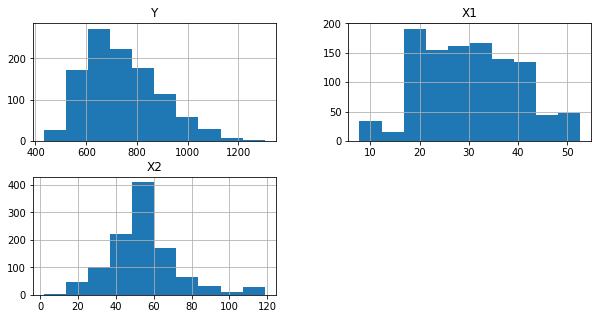

In [7]:
data.hist(figsize = (10, 5))

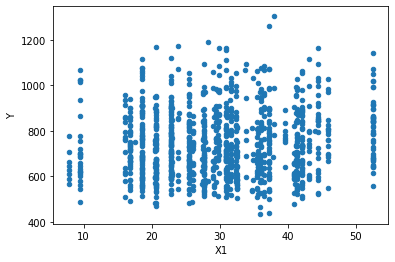

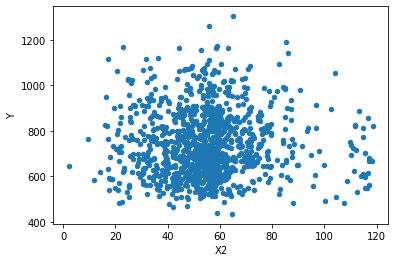

In [8]:
for i in data.columns:
    if i != 'Y':
        data.plot.scatter(x = i, y = 'Y')

Из графика (X1, Y) мы делаем предположение, что X1 принимает дискретное множество значений

In [9]:
len(data['X1']), len(set(data['X1']))

(1089, 68)

Действительно так. Это вполне логично, так как количество классов ограничено, то есть у учеников одинаковые классы, тем самым одлинаковые показатели NO2, а дома у всех учеников разные.

- Какой вывод вы можете сделать?

Во первых, можно сделать предположение о том, что во втором графике не наблюдается никакой линейной зависимости.

Во вторых, наглядно не видно есть ли зависимость линейная на первом графике, так как х1 принимает дискретное множество значений. Может быть стоит рассмотреть средние по классам.


- Теперь посмотрим на, так называемый, `heatmap`. Если простыми словами, то это просто красивая корреляционная матрица

In [10]:
# Самый простой способ сделать heatmap - взять из библиотеки seaborn
import seaborn as sns

<AxesSubplot: >

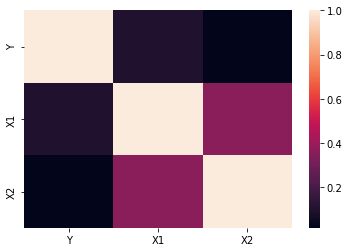

In [11]:
sns.heatmap(data.corr())

- Какой вывод можно сделать?

Heatmap показывает, что есть корреляция между X1 и X2. И х2 и Y абсолютно не коррелируют.

- Подумайте над гипотезами о взаимосвязи между зависимой переменной и регрессорами (как переменная X *может влиять* на Y)
- Преобразуйте переменные, если необходимо
- Постройте первую версию модели

Давайте для начала в тупую рассчитаем модель без каких-либо преобразований даных.

In [23]:
import statsmodels.formula.api as smf

In [24]:
data

,Y,X1,X2
0,764.584000,16.087734,26.794014
1,855.818898,16.087734,33.398342
2,932.983051,16.087734,29.154180
3,506.440945,16.087734,25.067272
4,580.301587,16.087734,30.572056
...,...,...,...
1084,736.968254,41.165585,55.760166
1085,696.990566,45.975480,59.031136
1086,951.915888,41.165585,64.622380
1087,971.128000,45.975480,62.968456


In [25]:
model1 = smf.ols('Y ~ X1 + X2', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.709
Date:                Fri, 03 Mar 2023   Prob (F-statistic):            0.00342
Time:                        11:16:00   Log-Likelihood:                -6930.0
No. Observations:                1084   AIC:                         1.387e+04
Df Residuals:                    1081   BIC:                         1.388e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    703.9088     16.862     41.744      0.000     670.822     736.996
X1             1.5806      0.475      3.327      0.001       0.649       2.513
X2            -0.1667      0.262     -0.636      0.525      -0.681       0.347
==============================================================================
Omnibus:                       56.031   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.021
Skew:                           0.595   Prob(JB):                     1.25e-14
Kurtosis:                       3.017   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Значима ли регрессия в целом?
- Все ли переменные значимы? Если нет, то, какие ваши дальнейшие шаги?

В целом Prob(F-statistic) говорит, что модель значима, но вот коэффиент при X2 отдельно не является значимым, то есть гипотеза о том, что он равен нулю имеет место. Как и предпологалось выше, можно сделать вывод, что от x2 нет зависимости. Дальше мы будем как-то преобразовывать данные.

- Какой у вас получился $R^2, R^2_{adj}, AIC, BIC$?
- Попробуйте улучшить их

| Metrics         | Model1 |
|--------------|:-----:|
| $R^2$ |  0.010 |
| $R^2_{adj}$      |  0.009 |
| $AIC$      |  1.387e+04 |
| $BIC$      |  1.388e+04 |

Попробуем улучшить.

Давайте посмотрим зависимость среднего по классу времени реакции от NO2 в классе

<AxesSubplot: xlabel='X1', ylabel='Y'>

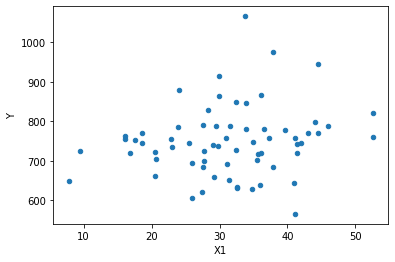

In [12]:
group_data = data[['X1', 'Y']].groupby('X1').mean()
group_data.reset_index(inplace=True)
group_data.plot.scatter('X1', 'Y')

В целом, выглядит получше, построим модель.

In [19]:
# Формируем датасетик, Y - среднее время реакции по классу
keys = [round(x, 3) for x in group_data['X1'].to_list()]
values = group_data['Y'].to_list()
dict_mean = {}
for key, value in zip(keys, values):
    dict_mean[key] = value

values_y = []
for x1 in [round(x, 3) for x in data['X1'].to_list()]:
    if x1 in dict_mean:
        values_y.append(dict_mean[x1])
        
        
new_data = pd.concat([
    pd.Series(values_y, name='Y'),
    data[['X1', 'X2']]
], axis=1)
new_data = new_data.dropna()
new_data['Y'].isna().sum()


In [21]:
new_data

,Y,X1,X2
0,754.616943,16.087734,26.794014
1,754.616943,16.087734,33.398342
2,754.616943,16.087734,29.154180
3,754.616943,16.087734,25.067272
4,754.616943,16.087734,30.572056
...,...,...,...
1084,757.260617,41.165585,55.760166
1085,788.241770,45.975480,59.031136
1086,757.260617,41.165585,64.622380
1087,788.241770,45.975480,62.968456


In [26]:
model2 = smf.ols('Y ~ X1 + X2', data = new_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     58.79
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           5.79e-25
Time:                        11:28:53   Log-Likelihood:                -5932.3
No. Observations:                1084   AIC:                         1.187e+04
Df Residuals:                    1081   BIC:                         1.189e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    687.0608      6.717    102.287      0.000     673.881     700.241
X1             1.8990      0.189     10.036      0.000       1.528       2.270
X2             0.0269      0.104      0.258      0.796      -0.178       0.232
==============================================================================
Omnibus:                      161.632   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.056
Skew:                           0.736   Prob(JB):                    1.57e-109
Kurtosis:                       5.987   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видим, что опять X2 не значимый, это вполне логично, мы сейчас наблюдаем за средним характеристиками по классу, а X2 отвечает за отдельные дома.

Сравним характеристики:

| Metrics         | Model1 | Model2 |
|--------------|:-----:| :-----:|
| $R^2$ | 0.010 |  0.098 |
| $R^2_{adj}$      |  0.009 |0.096 |
| $AIC$      |  1.387e+04 | 1.187e+04 |
| $BIC$      |  1.388e+04 | 1.189e+04 |

Характеристики AIC и BIC уменьшились - мы движемся в правильном направлении.

Исключим теперь из рассмотрения x2

In [27]:
new_data2 = new_data[['Y', 'X1']]
new_data2

,Y,X1
0,754.616943,16.087734
1,754.616943,16.087734
2,754.616943,16.087734
3,754.616943,16.087734
4,754.616943,16.087734
...,...,...
1084,757.260617,41.165585
1085,788.241770,45.975480
1086,757.260617,41.165585
1087,788.241770,45.975480


In [28]:
model3 = smf.ols('Y ~ X1', data = new_data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     117.6
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           4.36e-26
Time:                        11:32:07   Log-Likelihood:                -5932.3
No. Observations:                1084   AIC:                         1.187e+04
Df Residuals:                    1082   BIC:                         1.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    688.0122      5.614    122.553      0.000     676.997     699.028
X1             1.9164      0.177     10.845      0.000       1.570       2.263
==============================================================================
Omnibus:                      160.893   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.128
Skew:                           0.732   Prob(JB):                    2.50e-109
Kurtosis:                       5.988   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В этой модели все коэффициенты являются значимыми, F-statistic показывает значимость модели, мы уменьшили AIC и BIC.

Давайте посмторим также вдруг усреднение NO2 дома тоже что-то даст в модель, усредним и время реакции по классу и NO2 дома по классу. Посмотрим, что из этого выйдет.

In [30]:
group_data = data.groupby('X1').mean()
group_data.reset_index(inplace=True)

model4 = smf.ols('Y ~ X1 + X2', data = data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.709
Date:                Fri, 03 Mar 2023   Prob (F-statistic):            0.00342
Time:                        11:59:10   Log-Likelihood:                -6930.0
No. Observations:                1084   AIC:                         1.387e+04
Df Residuals:                    1081   BIC:                         1.388e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    703.9088     16.862     41.744      0.000     670.822     736.996
X1             1.5806      0.475      3.327      0.001       0.649       2.513
X2            -0.1667      0.262     -0.636      0.525      -0.681       0.347
==============================================================================
Omnibus:                       56.031   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.021
Skew:                           0.595   Prob(JB):                     1.25e-14
Kurtosis:                       3.017   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как мы видим, ничего хорошего из этого не вышло.

Я считаю, что рассмотрение других признаков не даст ответа на вопрос влият ли как-то NO2 на время реакции, так как другие признаки будут вносить свой вклад в оценку времени реакции и "разбавлять" нашу оценку своими весами.

- По какой метрике вы бы решали, что ваша регрессия улучшилась?

Я смотрел на F-statistic, чтобы сказать что-то о модели в целом. Потом я смотрел на значимость отдельных коэфициентов. Также старался уменьшить AIC и BIC, ну и хотелось бы долю значений объясненных регрессией, то есть R^2 тоже побольше. Но в основном, я смотрел на значимость и на AIC и BIC, чтобы сказать, какая из моделей лучше.

В итоге модель 3 показала лучшие результаты - модель с усредненным значением времени реакции по классу и NO2 в классе. Если мы хотели ответить на вопрос есть ли какая-то зависимость между NO2 в воздухе и временем реакции, то после исследования можно сказать, что да. Чем больше NO2 в классе, тем больше время реакции.

# №3 (40 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по оценке стоимости недвижимости в стартапе 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Зато они очень хорошо разбираются в бизнесе
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) замечательный датасет (`HW_001_002.zip`). Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть линейной (хотя бы на первых порах, в будущем, после курса по ML, можете брать и нелинейные модели)
    - Во-вторых, ваша цель не просто предсказание цены на ту или иную недвижимости, а **описание механизма ценообразования на рынке**
    - В-третьих, вашей команде очень важно, чтобы результаты модели были адекватными. **За каждой из включенных переменных должна стоять гипотеза о том, почему эта переменная влияет на цену**. Значимость переменной не является достаточным объяснением о включении переменной в конечную модель
- Помните, что это лишь первая версия модели. Основая цель для текущего анализа - это понимание того, 
    - какие данные есть, 
    - как они "выглядят", 
    - какая получается модель, 
    - какие выводы можно сделать, 
    - насколько эти выводы адекватны и соответствуют вашим гипотезам,
    - как можно еще улучшить модель
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (не будет `seed`, если/где надо, будет 0 за это задание)
    - Было не стыдно показать CEO и др. в стартапе (если графики будут без подписей осей и названия, как минимум, будет 0)

In [202]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [203]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [204]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [205]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Давайте переведем категориальные признаки в числовые.

In [206]:
for col in train.columns:
    if train[col].dtype == 'O':
        train[col] = pd.Categorical(train[col])
        train[col] = train[col].cat.codes 




In [207]:
train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,70.049958,10516.828082,0.995890,-0.909589,1.942466,2.777397,0.000685,...,2.758904,-0.989726,-0.532877,-0.892466,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,24.284752,9981.264932,0.063996,0.372151,1.409156,0.707666,0.026171,...,40.177307,0.158916,1.029191,0.555437,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,59.000000,7553.500000,1.000000,-1.000000,0.000000,3.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,730.500000,50.000000,3.000000,69.000000,9478.500000,1.000000,-1.000000,3.000000,3.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,1095.250000,70.000000,3.000000,80.000000,11601.500000,1.000000,-1.000000,3.000000,3.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,738.000000,2.000000,3.000000,3.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


Посмотрим зависимости отдельных признаков.

C:\Users\lubin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


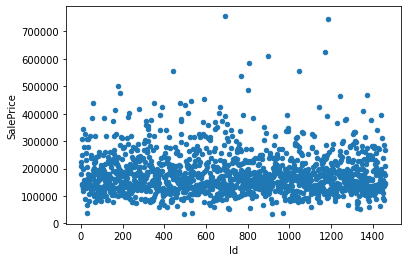

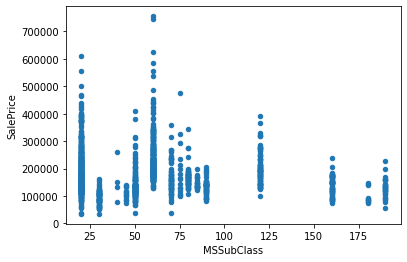

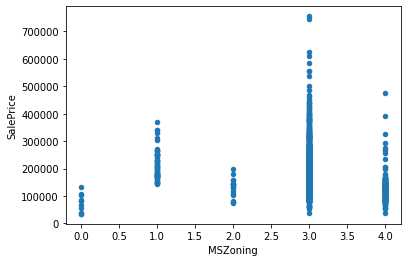

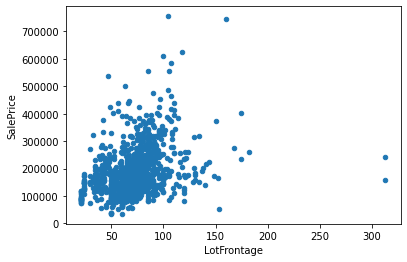

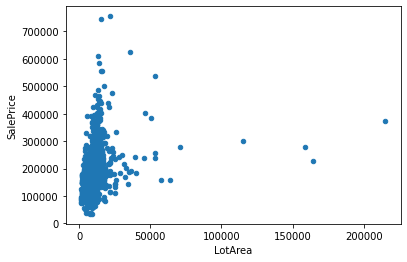

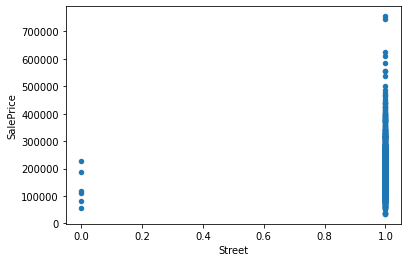

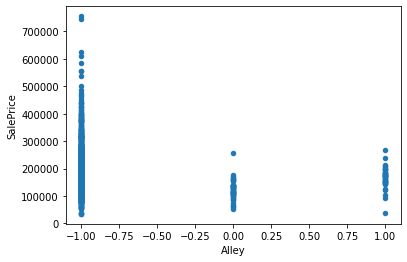

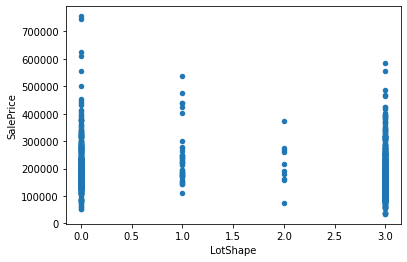

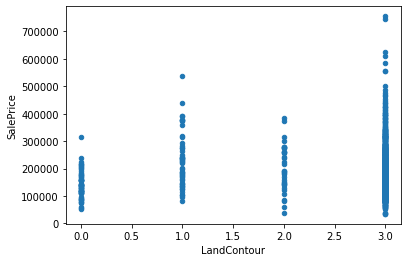

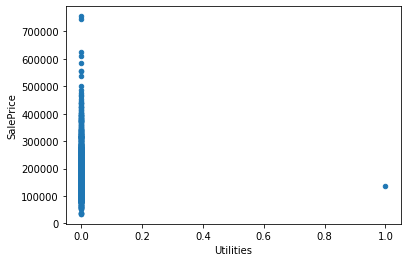

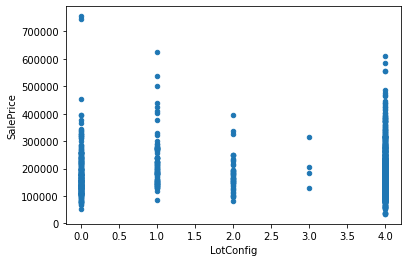

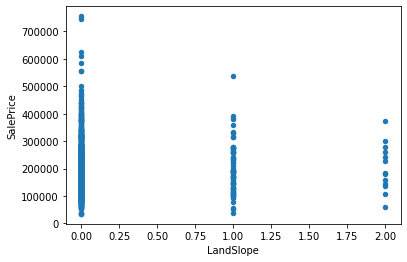

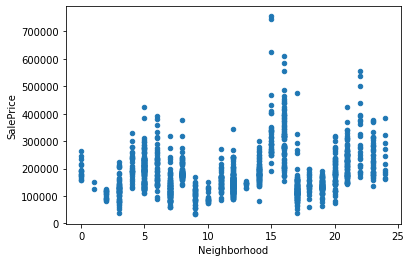

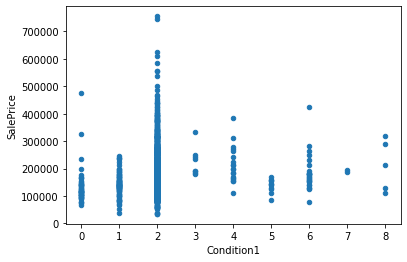

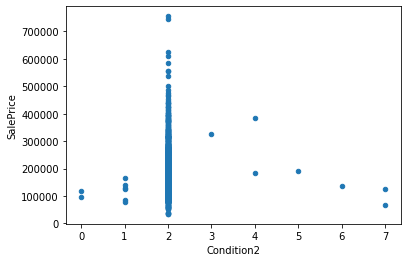

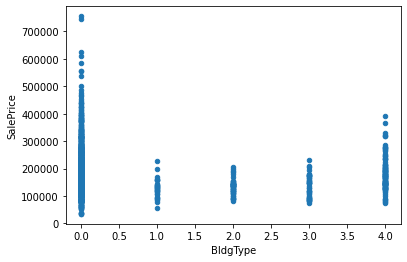

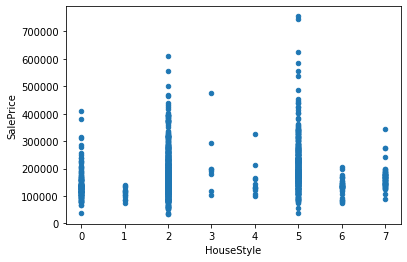

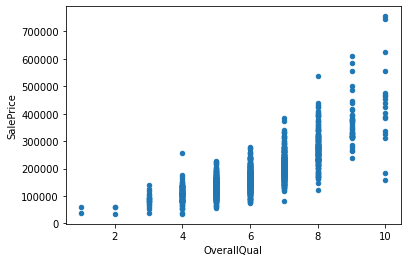

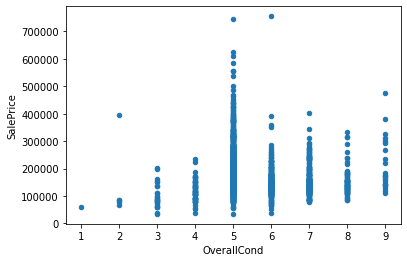

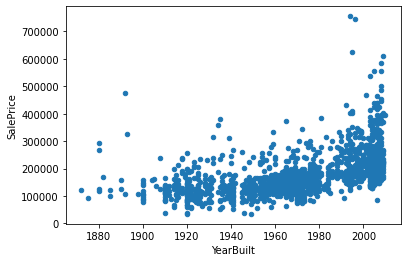

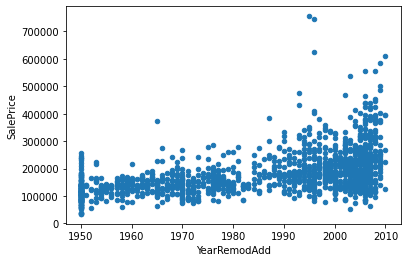

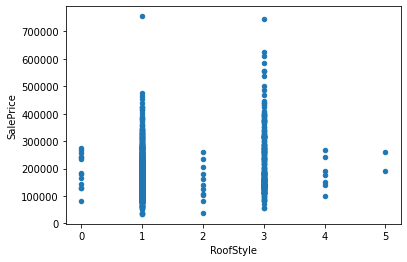

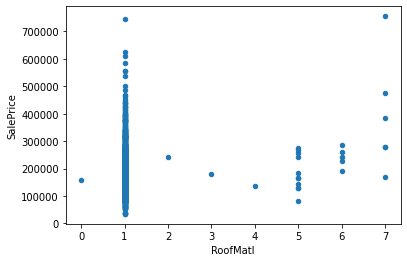

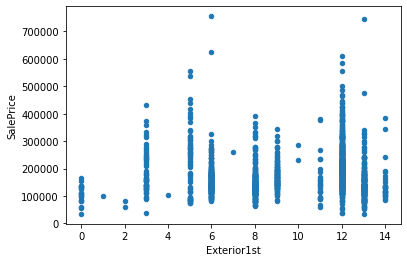

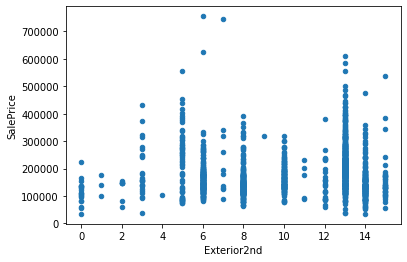

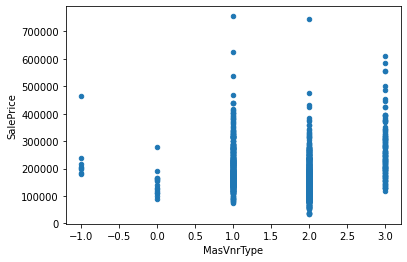

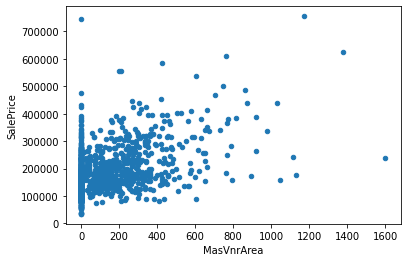

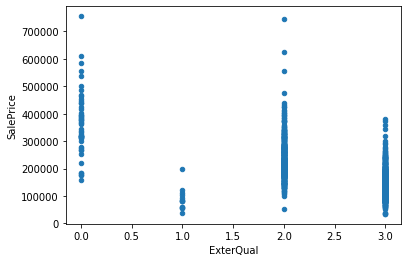

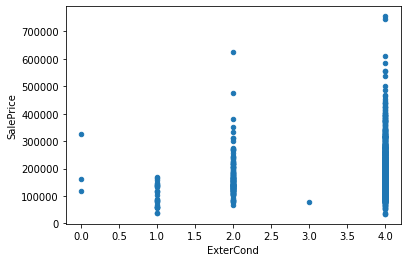

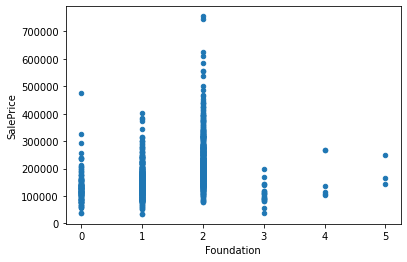

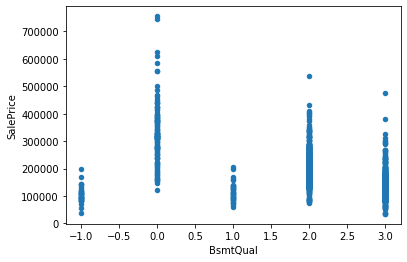

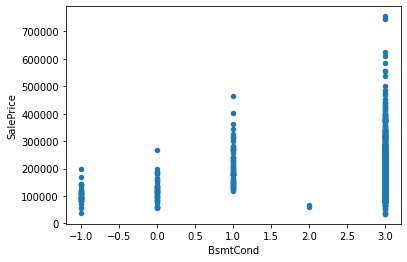

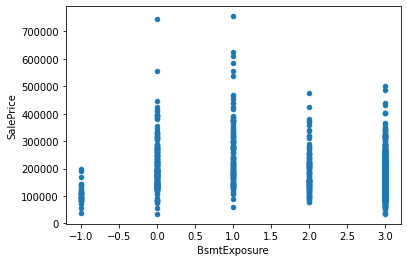

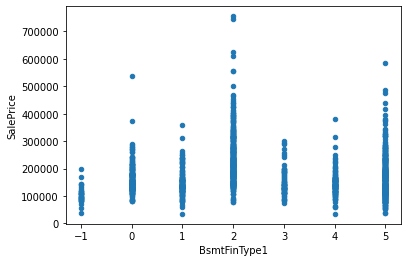

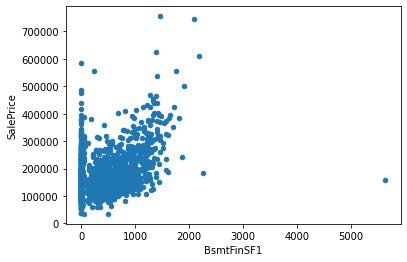

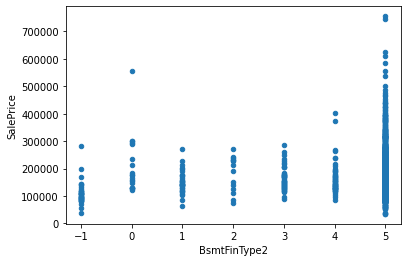

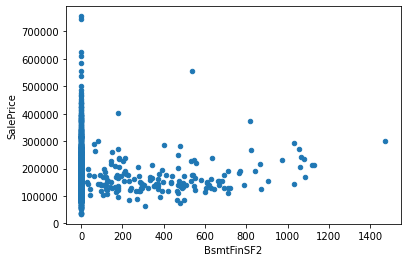

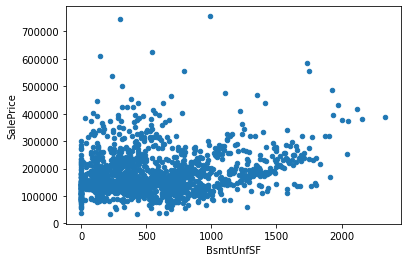

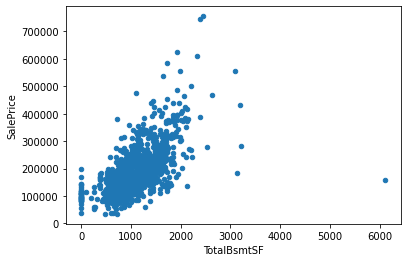

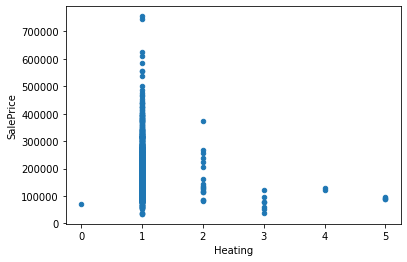

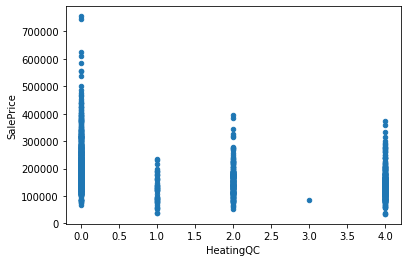

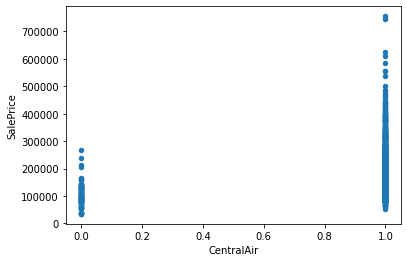

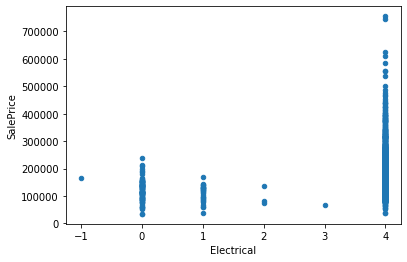

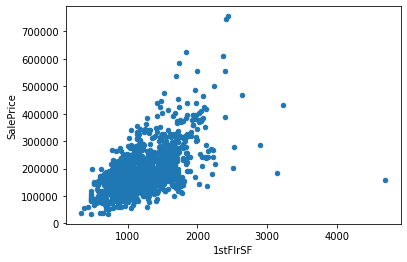

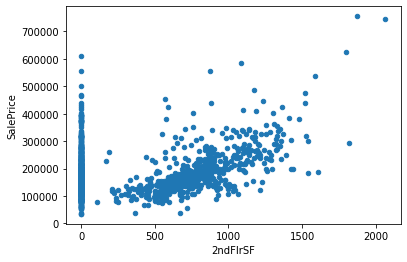

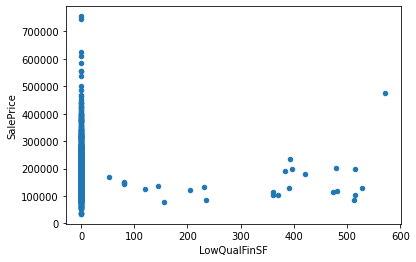

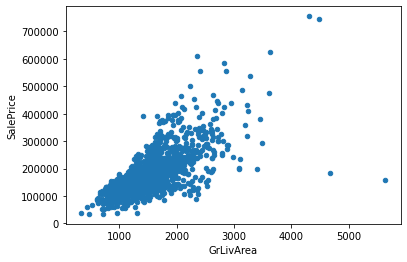

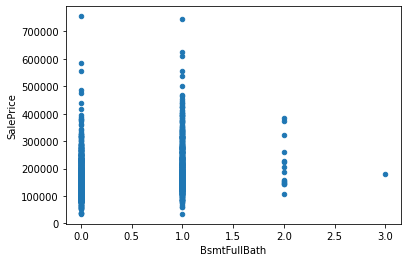

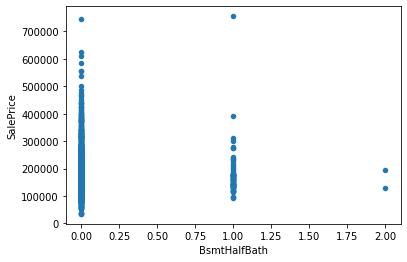

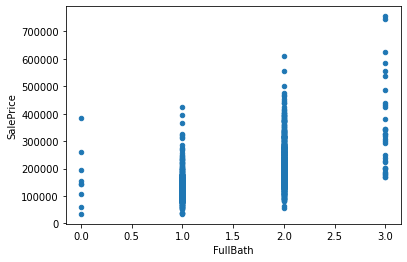

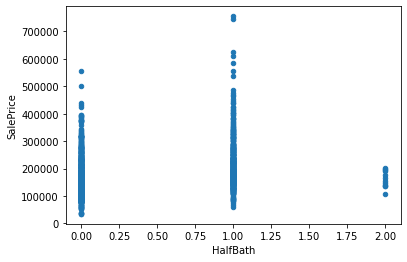

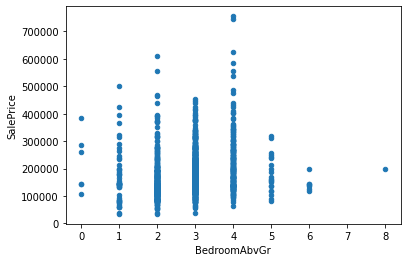

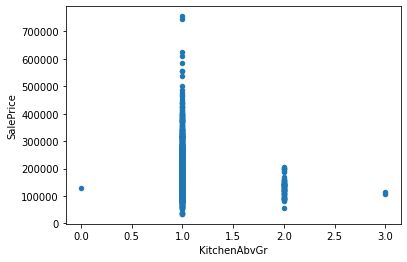

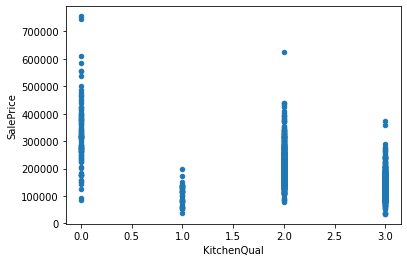

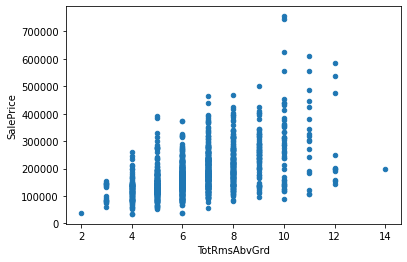

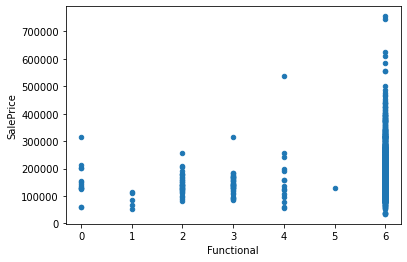

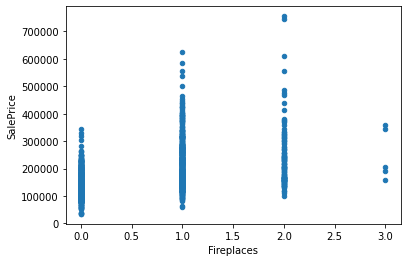

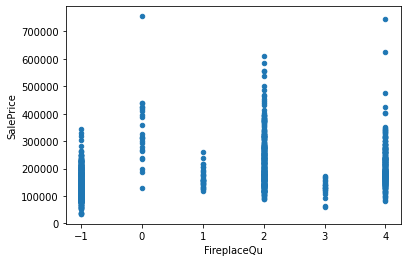

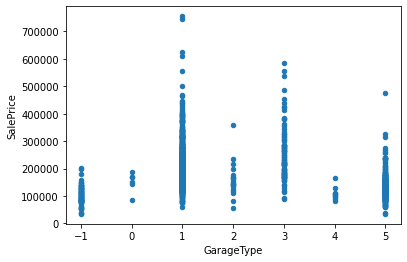

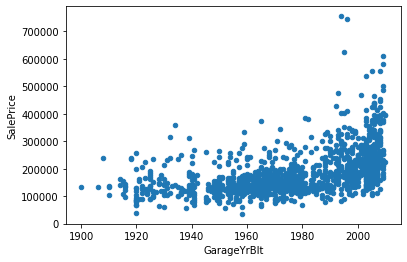

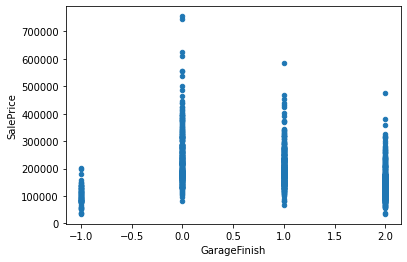

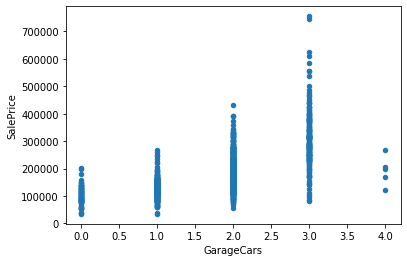

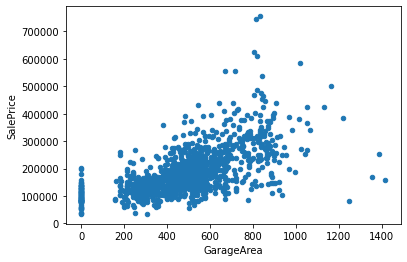

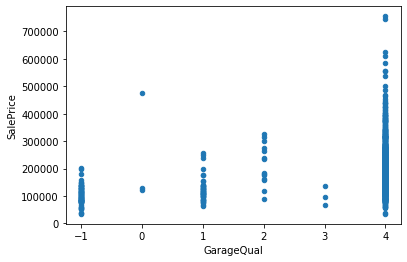

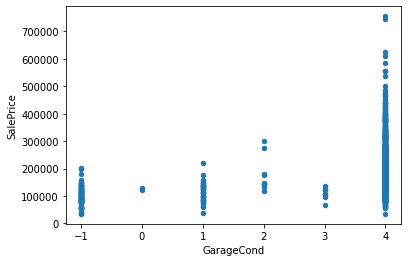

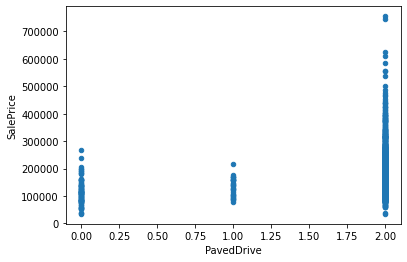

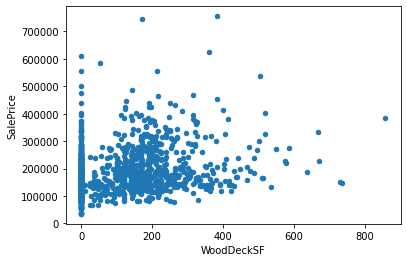

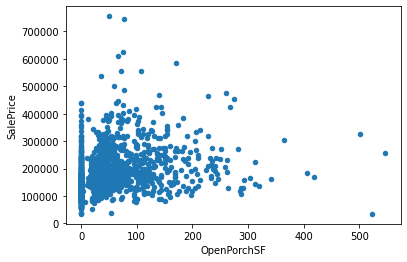

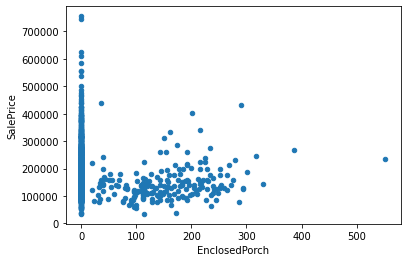

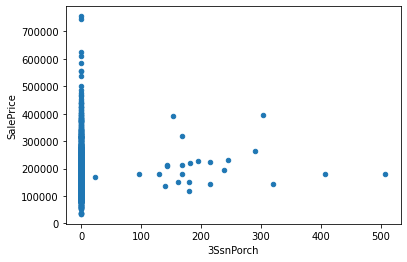

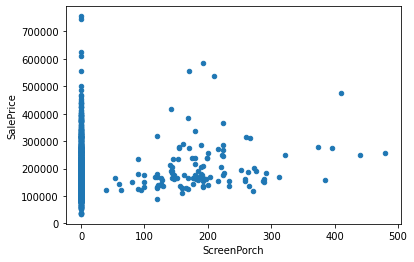

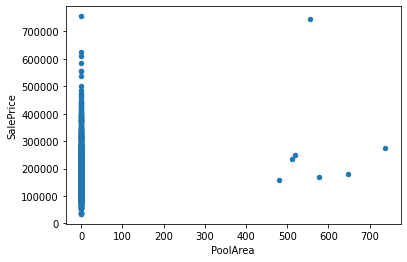

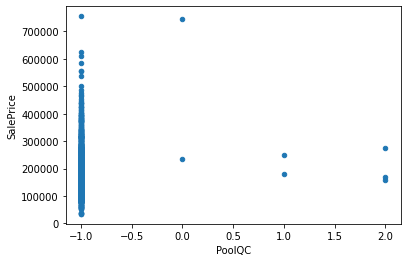

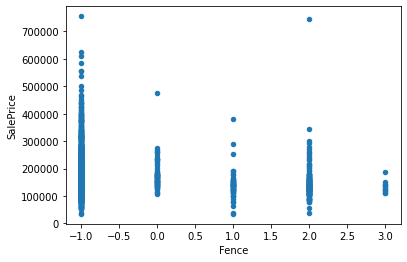

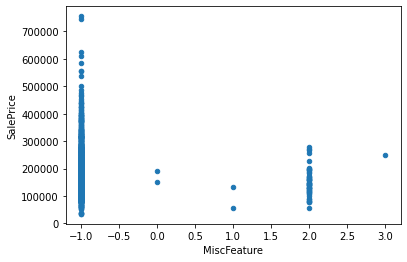

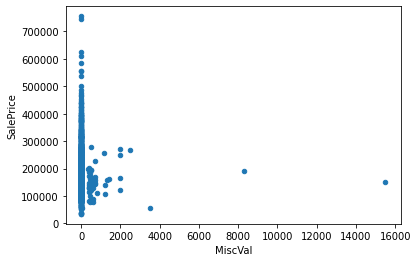

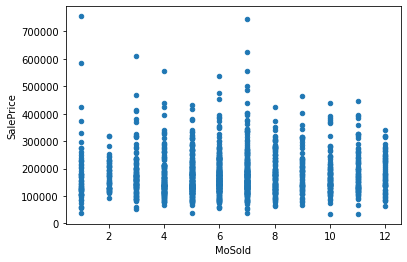

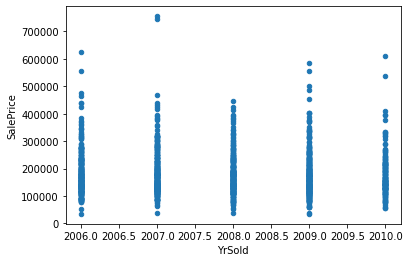

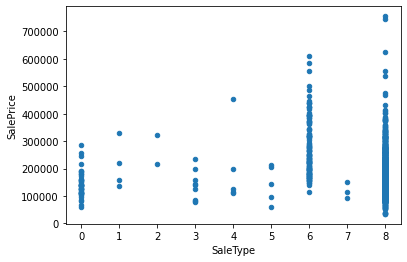

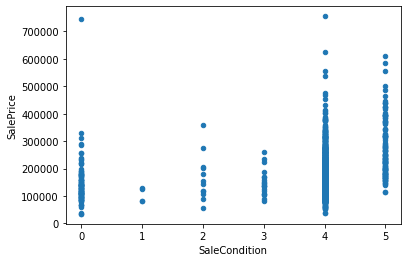

In [208]:
for i in train.columns:
    if i != 'SalePrice' and 'Id':
        train.plot.scatter(x = i, y = 'SalePrice')

<AxesSubplot: >

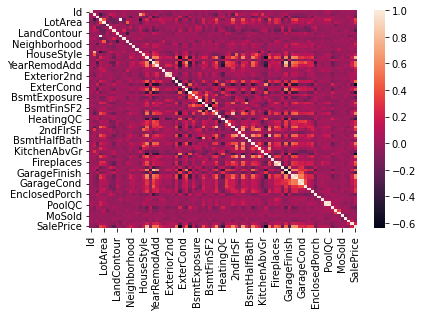

In [209]:
sns.heatmap(train.corr())

Поанализируем VIF.

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [211]:
# Выкинем столбец 'ID' и 'SalePrice' 
train_X = train.loc[:, train.columns != 'SalePrice'].drop(['Id'], axis=1)
train_X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,-1,3,3,0,4,...,0,0,-1,-1,-1,0,2,2008,8,4
1,20,3,80.0,9600,1,-1,3,3,0,2,...,0,0,-1,-1,-1,0,5,2007,8,4
2,60,3,68.0,11250,1,-1,0,3,0,4,...,0,0,-1,-1,-1,0,9,2008,8,4
3,70,3,60.0,9550,1,-1,0,3,0,0,...,0,0,-1,-1,-1,0,2,2006,8,0
4,60,3,84.0,14260,1,-1,0,3,0,2,...,0,0,-1,-1,-1,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,-1,3,3,0,4,...,0,0,-1,-1,-1,0,8,2007,8,4
1456,20,3,85.0,13175,1,-1,3,3,0,4,...,0,0,-1,2,-1,0,2,2010,8,4
1457,70,3,66.0,9042,1,-1,3,3,0,4,...,0,0,-1,0,2,2500,5,2010,8,4
1458,20,3,68.0,9717,1,-1,3,3,0,4,...,0,0,-1,-1,-1,0,4,2010,8,4


In [212]:
# Заполним Nanы средним по столбцу
train_X = train_X.fillna(train_X.mean())

Сформируем те столбцы, у которых VIF не улетает в небо.

In [213]:
vif = {}
cols_vif = []
for i in range(train_X.shape[1]):
    vif[train_X.columns[i]] = variance_inflation_factor(train_X.values, i)
    if vif[train_X.columns[i]] < 20:
        cols_vif.append(train_X.columns[i])

        


C:\Users\lubin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Вот эти столбцы:

In [214]:
cols_vif

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'Alley',
 'LotShape',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'MasVnrArea',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'SaleCondition']

In [215]:
import statsmodels.api as sm

Применим регрессию в тупую, очевидно имеем случай переобучения

In [216]:
results = sm.OLS(endog=train['SalePrice'], exog=train_X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              827.2
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                        0.00
Time:                        18:36:19   Log-Likelihood:                         -17063.
No. Observations:                1460   AIC:                                  3.428e+04
Df Residuals:                    1383   BIC:                                  3.469e+04
Df Model:                          77                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass      -66.7349     42.369     -1.575      0.115    -149.848      16.379
MSZoning      -2086.2326   1456.684     -1.432      0.152   -4943.783     771.317
LotFrontage    -130.5456     47.148     -2.769      0.006    -223.035     -38.056
LotArea           0.4155      0.100      4.136      0.000       0.218       0.613
Street         3.432e+04   1.32e+04      2.601      0.009    8436.465    6.02e+04
Alley         -2820.0567   2447.859     -1.152      0.249   -7621.974    1981.861
LotShape       -758.4848    617.061     -1.229      0.219   -1968.962     451.993
LandContour    1752.0509   1259.326      1.391      0.164    -718.344    4222.446
Utilities     -4.669e+04    3.1e+04     -1.505      0.133   -1.08e+05    1.42e+04
LotConfig         1.0399    510.550      0.002      0.998   -1000.497    1002.576
LandSlope      4609.0156   3571.448      1.291      0.197   -2397.025    1.16e+04
Neighborhood    379.4213    146.097      2.597      0.010      92.826     666.017
Condition1     -659.7204    948.051     -0.696      0.487   -2519.495    1200.054
Condition2    -9405.4923   3129.979     -3.005      0.003   -1.55e+04   -3265.472
BldgType      -2936.0908   1399.454     -2.098      0.036   -5681.374    -190.808
HouseStyle     -672.4284    610.813     -1.101      0.271   -1870.649     525.793
OverallQual    1.023e+04   1108.093      9.230      0.000    8054.180    1.24e+04
OverallCond    5799.2123    978.926      5.924      0.000    3878.872    7719.553
YearBuilt       237.8243     73.730      3.226      0.001      93.190     382.459
YearRemodAdd     15.4811     63.903      0.242      0.809    -109.876     140.838
RoofStyle      1029.4787   1050.288      0.980      0.327   -1030.851    3089.808
RoofMatl       4563.4565   1403.476      3.252      0.001    1810.285    7316.628
Exterior1st   -1093.2665    489.005     -2.236      0.026   -2052.537    -133.996
Exterior2nd     673.7982    442.186      1.524      0.128    -193.629    1541.226
MasVnrType     3779.4336   1377.902      2.743      0.006    1076.430    6482.437
MasVnrArea       32.1559      5.657      5.684      0.000      21.058      43.254
ExterQual     -9895.1585   1837.880     -5.384      0.000   -1.35e+04   -6289.824
ExterCond       777.4286   1170.885      0.664      0.507   -1519.474    3074.331
Foundation       50.4207   1571.038      0.032      0.974   -3031.455    3132.296
BsmtQual      -7165.0447   1265.237     -5.663      0.000   -9647.037   -4683.053
BsmtCond       2332.2089   1223.008      1.907      0.057     -66.942    4731.359
BsmtExposure  -2923.3020    817.646     -3.575      0.000   -4527.263   -1319.341
BsmtFinType1   -325.5436    581.743     -0.560      0.576   -1466.739     815.651
BsmtFinSF1        7.8584      2.

Ничего хорошего мы не получили.

Давайте пока оставим вычисленные VIF, а просто попытаемся понизить размерность данных.

Я выбрал основной способ понижения размерности - метод опорных векторов (перед этим нам нужно стандортизировать данные). 

In [217]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

In [222]:
# Трансформируем выборку оставляя только n_components главных компонент
n_components = 6
columns = [f'X{i}' for i in range(1, n_components+1)]

train_X_pca = (train_X - train_X.mean()) / train_X.std()
pca = PCA(n_components = n_components)
new_train_X_pca = pca.fit_transform(train_X_pca)

new_train_X_pca

array([[ 2.0324758 , -0.05177089, -1.93097467, -0.7807509 ,  1.04788506,
        -0.85843794],
       [ 0.26965015, -1.46338486,  1.83728001, -0.20924794,  0.16552431,
        -0.5212215 ],
       [ 2.77977461,  0.00550291, -1.13120123, -0.78891422,  1.01487047,
        -1.07938477],
       ...,
       [ 1.27399166,  2.70282817,  0.45627225,  0.25880083,  1.29393499,
        -0.71950054],
       [-3.01431556, -2.3128363 ,  1.89609575,  0.58414616, -0.32769008,
         0.63624624],
       [-1.08960282, -2.00045466,  1.58354739,  0.66798588,  0.82271414,
        -1.54745272]])

In [223]:
data = pd.DataFrame.from_records(new_train_X_pca, columns=columns)

In [224]:
data = pd.concat([data, train['SalePrice']], axis=1)
data

,X1,X2,X3,X4,X5,X6,SalePrice
0,2.032476,-0.051771,-1.930975,-0.780751,1.047885,-0.858438,208500
1,0.269650,-1.463385,1.837280,-0.209248,0.165524,-0.521221,181500
2,2.779775,0.005503,-1.131201,-0.788914,1.014870,-1.079385,223500
3,-1.029302,1.324517,1.256230,-1.371756,0.495177,1.159980,140000
4,5.115542,1.196294,0.142738,-0.454313,1.496086,-0.271674,250000
...,...,...,...,...,...,...,...
1455,1.289456,1.365589,-2.034647,-1.679389,-0.210031,-0.655392,175000
1456,1.075675,-1.036138,3.742123,0.502688,-0.130866,0.314806,210000
1457,1.273992,2.702828,0.456272,0.258801,1.293935,-0.719501,266500
1458,-3.014316,-2.312836,1.896096,0.584146,-0.327690,0.636246,142125


Нарисуем зависимости таргета от трансформированной выборки 

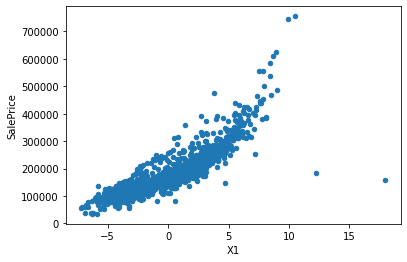

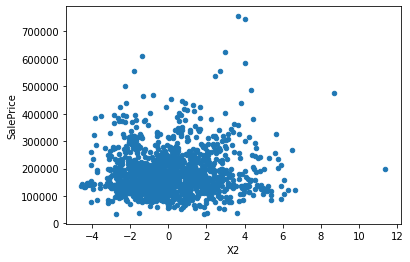

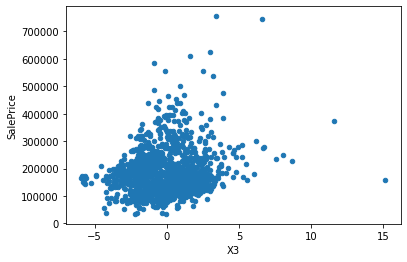

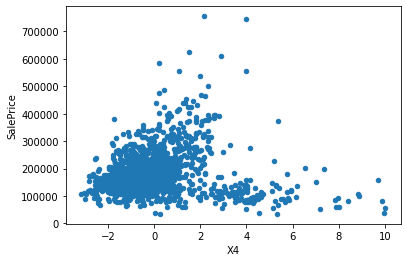

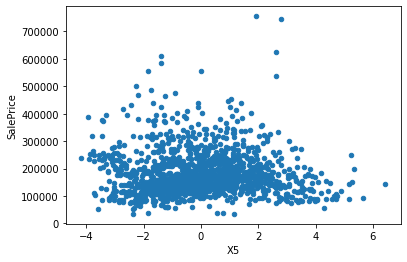

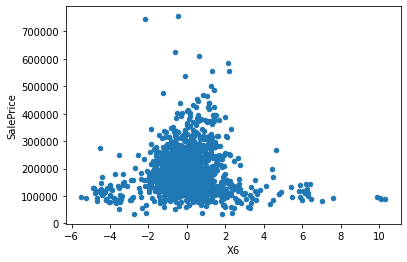

In [225]:
for i in data.columns:
    if i != 'SalePrice':
        data.plot.scatter(x = i, y = 'SalePrice')

Применим регрессионную модель к трансформированной выборке (без применения отсечки по VIF)

In [226]:
exog = sm.add_constant(data.drop(columns=['SalePrice'], axis=1))
results = sm.OLS(endog=data['SalePrice'], exog=exog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     810.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:37:56   Log-Likelihood:                -17472.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1453   BIC:                         3.499e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.809e+05    999.465    181.018      0.000    1.79e+05    1.83e+05
X1          2.145e+04    313.705     68.362      0.000    2.08e+04    2.21e+04
X2          3495.2579    502.712      6.953      0.000    2509.140    4481.376
X3          5125.8494    508.836     10.074      0.000    4127.718    6123.980
X4          3193.4344    555.737      5.746      0.000    2103.302    4283.567
X5         -1197.0064    579.415     -2.066      0.039   -2333.586     -60.426
X6          -193.3578    624.139     -0.310      0.757   -1417.667    1030.952
==============================================================================
Omnibus:                      505.456   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77325.885
Skew:                          -0.454   Prob(JB):                         0.00
Kurtosis:                      38.641   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Получили результат, который не очень нас устраивает, так как AIC и BIC большие

Далее, давайте оставим те столбцы, для которых VIF не улетает в небо, благо мы их вычислили и запомнили выше.

In [229]:
train_X_vif = train_X[cols_vif]

Опять же построим регрессионную модель.

In [230]:
data = pd.concat([train_X_vif, train['SalePrice']], axis=1)
exog = sm.add_constant(data.drop(columns=['SalePrice'], axis=1))
results = sm.OLS(endog=data['SalePrice'], exog=exog).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     78.96
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:39:18   Log-Likelihood:                -17664.
No. Observations:                1460   AIC:                         3.541e+04
Df Residuals:                    1417   BIC:                         3.564e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.196e+05   1.47e+04      8.128      0.000    9.08e+04    1.48e+05
MSSubClass      -44.8868     52.329     -0.858      0.391    -147.537      57.763
LotFrontage     177.7399     65.432      2.716      0.007      49.387     306.093
LotArea           0.7799      0.145      5.394      0.000       0.496       1.064
Alley         -4407.0320   3424.929     -1.287      0.198   -1.11e+04    2311.443
LotShape      -2611.3106    901.788     -2.896      0.004   -4380.294    -842.327
Utilities     -7.941e+04   4.56e+04     -1.742      0.082   -1.69e+05       1e+04
LotConfig       188.6003    750.350      0.251      0.802   -1283.316    1660.517
LandSlope     -9300.5132   4843.512     -1.920      0.055   -1.88e+04     200.712
Neighborhood    926.4994    206.267      4.492      0.000     521.879    1331.120
Condition1      961.4732   1374.025      0.700      0.484   -1733.869    3656.815
BldgType      -3120.8131   1750.154     -1.783      0.075   -6553.985     312.359
HouseStyle      265.8911    824.884      0.322      0.747   -1352.233    1884.016
RoofStyle      5017.4777   1487.254      3.374      0.001    2100.022    7934.933
RoofMatl       7752.1200   2014.212      3.849      0.000    3800.962    1.17e+04
MasVnrType     6282.1174   2012.822      3.121      0.002    2333.686    1.02e+04
MasVnrArea       91.9289      7.741     11.875      0.000      76.743     107.114
Foundation     9152.8063   2034.870      4.498      0.000    5161.124    1.31e+04
BsmtQual      -9305.6814   1558.226     -5.972      0.000   -1.24e+04   -6249.004
BsmtExposure   -784.4228   1138.013     -0.689      0.491   -3016.795    1447.949
BsmtFinType1   1982.1598    721.124      2.749      0.006     567.574    3396.746
Heating        -1.08e+04   4085.859     -2.644      0.008   -1.88e+04   -2788.125
HeatingQC     -5031.7084    786.579     -6.397      0.000   -6574.693   -3488.723
Electrical     4619.1144   1188.737      3.886      0.000    2287.241    6950.988
BsmtFullBath   1.415e+04   2639.627      5.362      0.000    8975.336    1.93e+04
BsmtHalfBath   4732.7150   5104.344      0.927      0.354   -5280.168    1.47e+04
HalfBath       1.446e+04   2752.277      5.253      0.000    9059.576    1.99e+04
KitchenQual   -2.451e+04   1733.312    -14.138      0.000   -2.79e+04   -2.11e+04
Fireplaces     2.081e+04   3451.167      6.029      0.000     1.4e+04    2.76e+04
FireplaceQu      15.3845   1058.068      0.015      0.988   -2060.163    2090.932
GarageType      113.0960    805.981      0.140      0.888   -1467.949    1694.141
GarageFinish   -482.2058   1645.278     -0.293      0.770   -3709.648    2745.236
WoodDeckSF       59.8500     10.155      5.893      0.000      39.929      79.771
OpenPorchSF      84.3843     19.006      4.440      0.000      47.102     121.667
EnclosedPorch    19.2411     20.446      0.941   

Проблема все та же, у нас очень большая размерность, поэтому ничего адекватного не получаем.

Применим метод опорных векторов к этой выборке

In [231]:
n_components = 6
columns = [f'X{i}' for i in range(1, n_components+1)]

train_X_pca = (train_X_vif - train_X_vif.mean()) / train_X_vif.std()
pca = PCA(n_components = n_components)
new_train_X_pca = pca.fit_transform(train_X_pca)

s, v, d = np.linalg.svd(new_train_X_pca)
print(v)

data = pd.DataFrame.from_records(new_train_X_pca, columns=columns)
data = pd.concat([data, train['SalePrice']], axis=1)
exog = sm.add_constant(data.drop(columns=['SalePrice'], axis=1))
results = sm.OLS(endog=data['SalePrice'], exog=exog).fit()
results.summary()

[77.52882144 62.32168444 53.70976143 52.07777588 47.24120282 45.2258477 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     440.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          8.40e-323
Time:                        18:39:36   Log-Likelihood:                -17787.
No. Observations:                1460   AIC:                         3.559e+04
Df Residuals:                    1453   BIC:                         3.563e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.809e+05   1240.615    145.832      0.000    1.78e+05    1.83e+05
X1          2.996e+04    611.435     48.997      0.000    2.88e+04    3.12e+04
X2          1619.7384    760.631      2.129      0.033     127.686    3111.791
X3          -994.7656    882.592     -1.127      0.260   -2726.057     736.526
X4         -9929.3941    910.250    -10.908      0.000   -1.17e+04   -8143.849
X5          8046.3950   1003.442      8.019      0.000    6078.045       1e+04
X6         -7763.6746   1048.158     -7.407      0.000   -9819.739   -5707.611
==============================================================================
Omnibus:                      416.370   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6882.235
Skew:                           0.877   Prob(JB):                         0.00
Kurtosis:                      13.491   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# №4 (20 баллов)*  
- Это задание со звездочкой
- Баллы за это задание идут как дополнительные баллы
- Общий балл за это домашнее задание не может превышать 100 баллов
- Например, если за предыдущие 3 задания было набрано 100 баллов и за это задание набрано 20 баллов, то итоговый балл будет 100 баллов. Если же за предыдущие 3 задания было набрано 90 баллов и за это задание набрано 20 баллов, то итоговый балл все равно будет 100 баллов

- В далеком XIX веке в Лондоне была эпидемия холеры
- В те времена считалось, что холера передается воздушно-капельным путем
- Но один ученый заподозрил, что это не так. Кол-во заболеваний не уменьшалось при соблюдении всех мер предосторожности при такой передаче заболевания
- Ученого звали John Snow ([Snow 1855](https://mixtape.scunning.com/references.html#ref-Snow1854))
- Разберем его идею к дизайну эксперимента 

**Нулевая гипотеза: холера передается водоснабжением**

- Как бы это проверяли, если бы имели бесконечные ресуры? Опишите идеальный эксперимент.

- Но такого сделать мы, конечно, не можем. Однако у нас есть следующая информация
- В 1800-х несколько водоснабжающих компанй обслуживали город. Они все брали воду из Темзы, которая, если верить нашей гипотезе, была зараженной
- Но в 1849 компания Lambeth передвинула свои трубу выше по течению, а компании Southwark и Vauxhall Waterworks Company нет
- Как бы нам это использовать для проверки нашей гипотезы?

- Ниже представлена таблица со смертностью в 1849 г. и 1854 г. для потребителей двух разных компаний

|Компания\Год|1849|1854|
|---|---|---|
|Southwark and Vauxhall|135|147|
|Lambeth|85|19|

- Пусть $Y$ - это смертность
- Пусть $D$ - это влияние чистой воды на смертность от холеры (очевидно, если нулевая гипотеза верна, то это влияние отрицательное)
- Пусть $L$ и $SV$ - это фиксированный эффект\влияние специфичный для каждой из компаний Lambeth и Southwark and Vauxhall, соответственно. Например, у них могут быть разные трубы и\или системы очистки воды

|Компания|Результат|
|---|---|
|Southwark and Vauxhall|$$Y=SV$$|
|Lambeth|$$Y=L+D$$|

- Почему мы не можем просто вычесть из результата Lambeth результат Southwark and Vauxhall?

- Однако, у нас еще есть временные данные
- Пусть $T$ - это некий временной эффект

|Компания|Время|Результат|
|---|---|---|
|Lambeth|До|$$Y=L$$|
||После|$$Y=L+D+T$$|

- Как будет выглядеть эта табличка для Southwark and Vauxhall?
- Чему будет равно $D$ на тех данных, что были выше?

- То, что вы проделали выше называется `DiD` (difference in differences). Это замечательный метод, который позволяет вам контролировать эффект от эксперимента (`treatment`) на какие-то другие переменные
- Он, отнюдь, не ограничивается временным эффектом, но для простоты задания не будет заходить дальше
- Давайте немного формул для понимания того, что было вами проделано. 
    - Вы нашли `D` - эффект, который оказала чистая вода на смертность от холеры. В идеальном мире, мы с вами бы его считали, как $E[Y_{T=1, S=1} - Y_{T=1, S=0}]$, т.е. уровень смертности в один и тот же момент времени ($T=1$) для контрольной ($S=0$) и тестовой ($S=1$) групп. Но, такое не всегда, мягко говоря, возможно.
    - Поэтому вам пришлось изхищряться, чтобы вычленить временной эффект, т.е. вы считали:
    $$D = (E[Y_{T=1}|S=1] - E[Y_{T=0}|S=1]) - (E[Y_{T=1}|S=0] - E[Y_{T=0}|S=0])$$
    - Это, конечно, замечательное число, но значимо ли оно? На этот вопрос нам с вами поможет ответить, в частности, простая линейная регрессия с дамми/бинарными переменными: $\hat{y} = \hat{\beta_0} + \hat{\beta_1} \cdot T + \hat{\beta_2} \cdot S + \hat{\beta_3} \cdot T \cdot S$
    - Если мы с вами посмотрим на $\beta_0$, то при $T=0, S=0 \rightarrow \hat{y} = \hat{\beta_0} \rightarrow E[y|T=0, S=0] = \hat{\beta_0}$ 
    - Хм, а если у нас $T=1, S=0 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_1} \rightarrow \hat{\beta_1} = \hat{y} - \hat{\beta_0} = E[y|T=1, S=0] - E[y|T=0, S=0]$
    - А если $T=0, S=1 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_2} \rightarrow \hat{\beta_2} = \hat{y} - \hat{\beta_0} = E[y|T=0, S=1] - E[y|T=0, S=0]$
    - А если 
    $$T=1, S=1 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_1} + \hat{\beta_2} +\hat{\beta_3} \rightarrow \\
    E[y|T=1, S=1] = E[y|T=0, S=0] + (E[y|T=1, S=0] - E[y|T=0, S=0]) + (E[y|T=0, S=1] - E[y|T=0, S=0]) +\hat{\beta_3} \rightarrow \\
    \hat{\beta_3} = (E[y|T=1, S=1] - E[y|T=0, S=1]) - (E[y|T=1, S=0] - E[y|T=0, S=0])$$
    - А вот и наш эффект, который мы так хотели посчитать и проверить на стат. значимость. Думаю, что вы уже знаете, как проверять стат. значимость коэффициентов линейной регрессии.

- Перейдем к чему-то с данными
- Надо понять маркетинговый эффект от рекламы на билбордах на увеличение депозитов ($\text{deposits}$) с мая ($JUL = 0$) по июль ($JUL = 1$)
- Всего есть 3 билборда в городе Porto Alegre ($POA = 1$) и никаких наших билбордов в городе Florianopolis ($POA = 0$)
- Посчитайте эффект от рекламы и проверьте его на значимость

In [ ]:
data = pd.read_csv("HW_001_003.csv")
data.head()

In [3]:
import matplotlib.pyplot


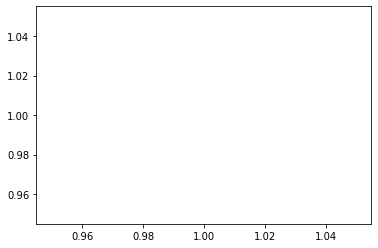

In [4]:
matplotlib.pyplot.plot(1, 1)

- В чем основная слабость этого подхода?